In [1]:
import os
os.environ["KILOSORT2_PATH"] = '/mnt/cube/earneodo/repos/Kilosort2'
os.environ["KILOSORT_PATH"] = '/mnt/cube/earneodo/repos/Kilosort'
os.environ["NPY_MATLAB_PATH"] = '/mnt/cube/earneodo/repos/npy-matlab'

import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw

In [2]:
ss.installed_sorters()

['kilosort2']

In [2]:
recording, sorting_true = se.example_datasets.toy_example(duration=10, num_channels=4, seed=0)

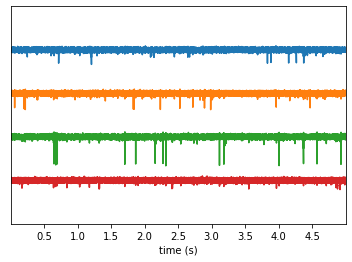

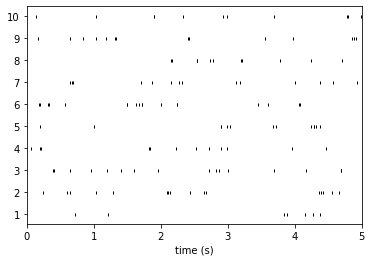

In [3]:
w_ts = sw.plot_timeseries(recording, trange=[0,5])
w_rs = sw.plot_rasters(sorting_true, trange=[0,5])

In [4]:
channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()

print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)

Channel ids: [0, 1, 2, 3]
Sampling frequency: 30000.0
Number of channels: 4


In [5]:
unit_ids = sorting_true.get_unit_ids()
spike_train = sorting_true.get_unit_spike_train(unit_id=unit_ids[0])

print('Unit ids:', unit_ids)
print('Spike train of first unit:', spike_train)

Unit ids: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Spike train of first unit: [ 21478  36186 115033 116600 124535 127993 131277 159400 163465 164645
 183164 192248 196081 214557 215749 233858 234350 250897 263249 267532
 284621 293768]


In [6]:
recording_prb = recording.load_probe_file('custom_probe.prb')
print('Channel ids:', recording_prb.get_channel_ids())
print('Loaded properties', recording_prb.get_shared_channel_property_names())
print('Label of channel 0:', recording_prb.get_channel_property(channel_id=0, property_name='label'))

# 'group' and 'location' can be returned as lists:
print(recording_prb.get_channel_groups())
print(recording_prb.get_channel_locations())

AssertionError: 

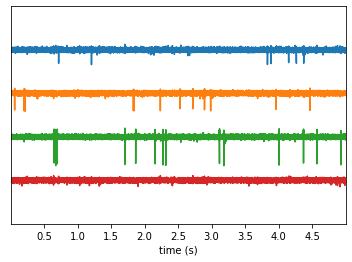

In [9]:
recording_f = st.preprocessing.bandpass_filter(recording, freq_min=300, freq_max=6000)
recording_cmr = st.preprocessing.common_reference(recording_f, reference='median')
w_ts = sw.plot_timeseries(recording_cmr, trange=[0,5])


In [8]:
print('Available sorters', ss.available_sorters())
print('Installed sorters', ss.installed_sorters())

Available sorters ['combinato', 'hdsort', 'herdingspikes', 'ironclust', 'kilosort', 'kilosort2', 'kilosort2_5', 'klusta', 'mountainsort4', 'spykingcircus', 'tridesclous', 'waveclus']
Installed sorters []


In [13]:
ss.available_sorters()

['combinato',
 'hdsort',
 'herdingspikes',
 'ironclust',
 'kilosort',
 'kilosort2',
 'kilosort2_5',
 'klusta',
 'mountainsort4',
 'spykingcircus',
 'tridesclous',
 'waveclus']

[]

[]